Pennes bioheat mathematical model

\begin{equation*}
  \begin{cases}
    \rho c\frac{\partial u(x, t)}{\partial t} = \nabla . [k \nabla u(x, t)] + \omega_b\rho_b c_b[u_a - u(x, t)] + Q_m + Q_r(x, t) &\text{para } \Omega\\
    k \nabla u(x, t) . \vec{n} = 0 &\text{ para x} \in \Omega_{I,II,IV} \\
    u(x, t) = 37 &\text{ para x} \in \Omega_{III}
  \end{cases}
\end{equation*}

Reescrevendo de modo a facilitar os passos...


$\rho c\frac{\partial T}{\partial t} = k \nabla^2 T + \omega_b \rho_b c_b(T_a - T) + Q_m$

Seja (I):

$\rho c\frac{\partial T}{\partial t}$

...e (II):

$k \nabla^2 T$

...e (III):

$\omega_b \rho_b c_b(T_a - T) + Q_m$

Temos (I) = (II) + (III)

Em (I) ficará:

$\rho c\frac{T^{n+1}_{i,j} - T^{n}_{i,j}}{h_t}$

Em (II) ficará:

$k\frac{T^n_{i+1,j} + T^n_{i-1,j} + T^n_{i,j+1} + T^n_{i,j-1} - 4T^n_{i,j}}{h^2}$

Em (III) ficará:

$\omega_b \rho_b c_b T_a - \omega_b \rho_b c_b T + Q_{m_{i,j}}$

Juntando tudo e isolando o termo $T^{n+1}_{i,j}$

$T^{n+1}_{i,j} = \frac{1}{\rho c} . [k\frac{h_t}{h^2}(T^n_{i+1,j} + T^n_{i-1,j} + T^n_{i,j+1} + T^n_{i,j-1} - 4T^n_{i,j}) + h_t(\omega_b \rho_b c_b T_a - \omega_b \rho_b c_b T + Q_{m_{i,j}}) + T^{n}_{i,j}]$

In [21]:
# Inicialização das bibliotecas e tudo mais.

import matplotlib.pyplot as plt, numpy as np

#from matplotlib import cm
from tqdm import tqdm

plt.rcParams['figure.figsize'] = [12, 10]

In [22]:
def criar_matriz_tecido(x, y):
    mt = np.zeros((len(x), len(y)))

    # Agora precisa criar um 'quadrado' de 1s dentro dessa matriz, representando o tumor
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            
            if (x[i] >= 0.005 and x[i] <= 0.015):
                if (y[j] >= 0.03 and y[j] <= 0.05):
                    mt[i, j] = 1
    
    return mt

In [23]:
# trabalho 2 começa aqui

h = 0.001
h_t = 0.1

x = np.arange(0, 0.03+h/2, h)
y = np.arange(0, 0.08+h/2, h)
t = np.arange(0, 1000+h_t/2, h_t)

tam_x = len(x) # dimensão do sistema
tam_y = len(y) # dimensão do sistema

# Condiçoes de Contorno
u_1 = 0  # neumann esquerdo
u_2 = 0  # neumann topo
u_3 = 37 # dirichlet direito
u_4 = 0  # neumann base

u_0 = 37 # condicao inicial

# Tipo do tecido; 0 = saudável / 1 = tumor
mt = criar_matriz_tecido(x, y)

# vetor com a solução
u = np.ones((tam_x, tam_y)) * u_0
u_new = np.ones((tam_x, tam_y)) * u_0

steps = len(t) #numero de passos de tempo

Q_m = np.zeros(2)
Q_m[0] = 420
Q_m[1] = 4200

w_b  = np.zeros(2)
w_b[0] = 0.0005
w_b[1] = 0.002

r = 1000
c = 4000
r_b = 1000
c_b = 4000
T_a = 37
kp = 0.5

sol_tempo = []
sol_tempo.append(u)

for k in tqdm(range(steps)):
  for i in range(len(x)):
    for j in range(len(y)):
      # para tratar do tipo Dirichlet, devemos atribuir diretamente no ponto (x_i,y_j)
      if (i == 0):
        u_new[i,j] = u_3
      else:
        # Tratando condicoes de contorno do tipo Neumann
        uijm = 2*h*u_1 + u[i,1]       if j==0       else u[i,j-1]
        uijp = 2*h*u_2 + u[i,tam_y-2] if j==tam_y-1 else u[i,j+1] 
        uipj = 2*h*u_4 + u[tam_x-2,j] if i==tam_x-1 else u[i+1,j] 
        uimj = u[i-1,j]

        u_new[i,j] = ((1/(r*c)) * ((kp * (h_t/h**2) * (uipj + uimj + uijp + uijm - 4*u[i,j])) + (h_t * ((w_b[int(mt[i,j])] * r_b * c_b * T_a) - (w_b[int(mt[i,j])] * r_b * c_b * u[i,j]) + (Q_m[int(mt[i,j])]))))) + u[i,j]
    u = np.copy(u_new)

    if (k % 100 == 0) :
      sol_tempo.append(u)

# print(u)

  0%|          | 0/10001 [00:00<?, ?it/s]

100%|██████████| 10001/10001 [02:48<00:00, 59.30it/s]


 62%|██████▎   | 20/32 [00:05<00:03,  3.84it/s]C:\Users\welson\AppData\Local\Temp\ipykernel_6900\665066162.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()
100%|██████████| 32/32 [00:09<00:00,  3.49it/s]


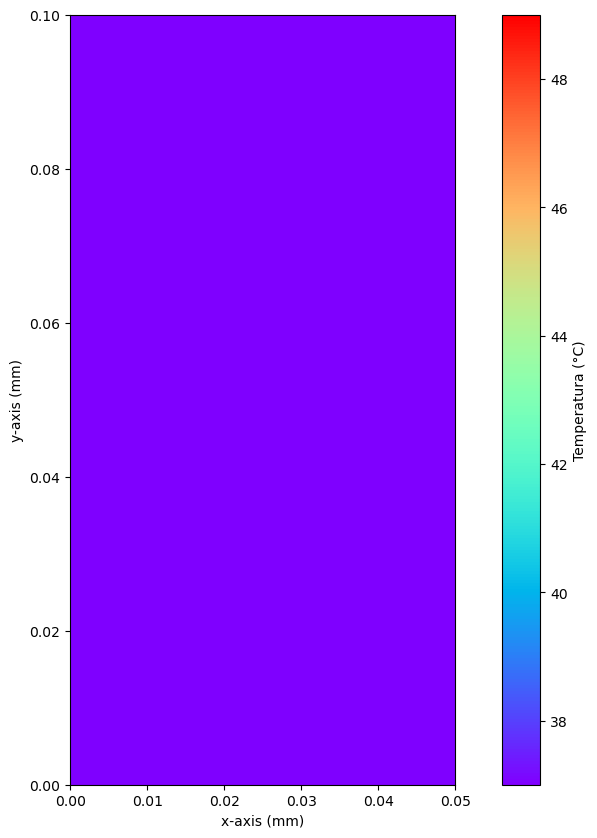

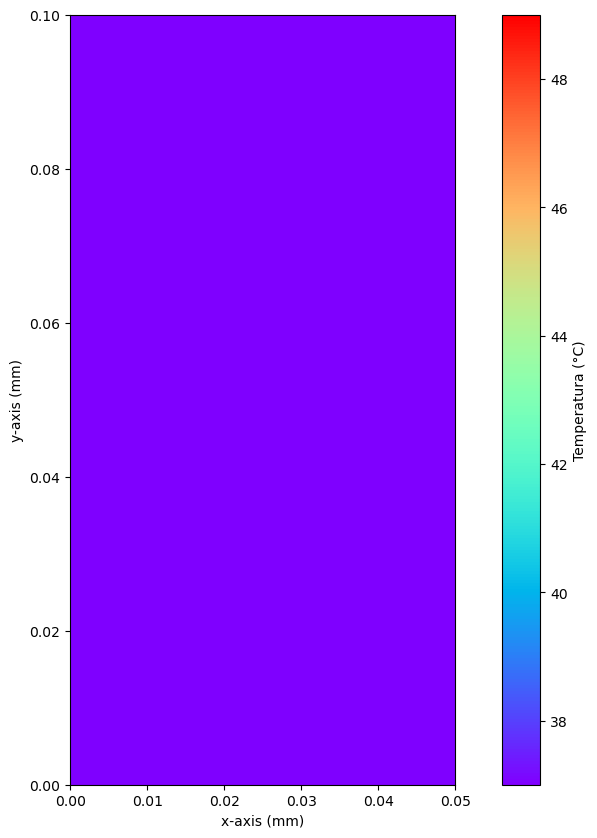

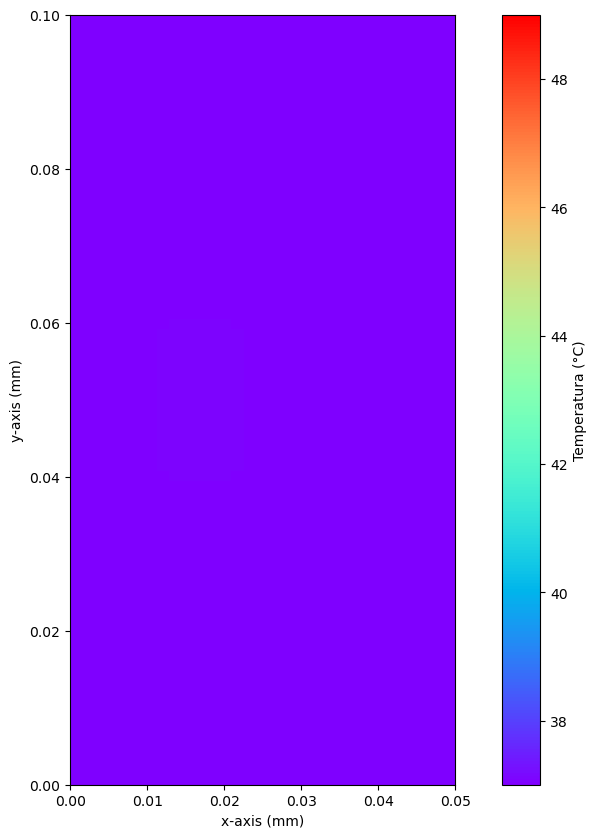

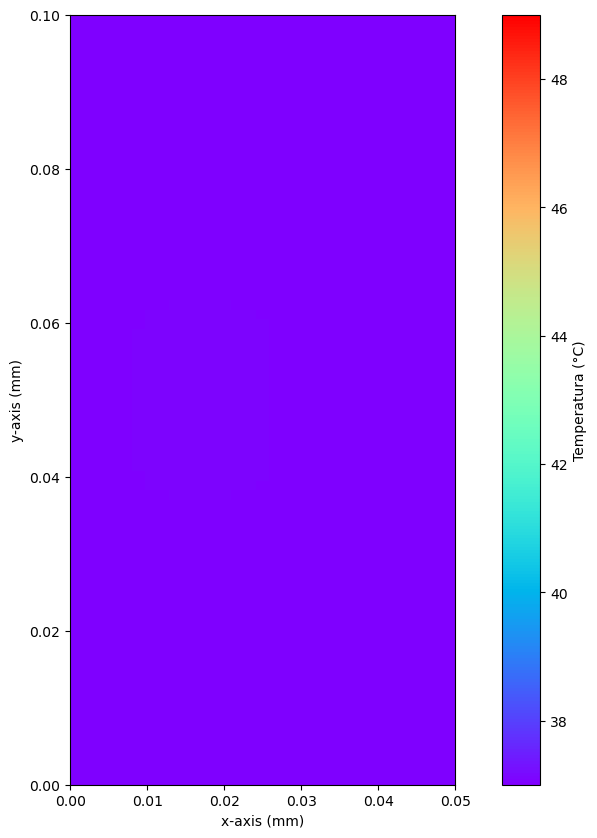

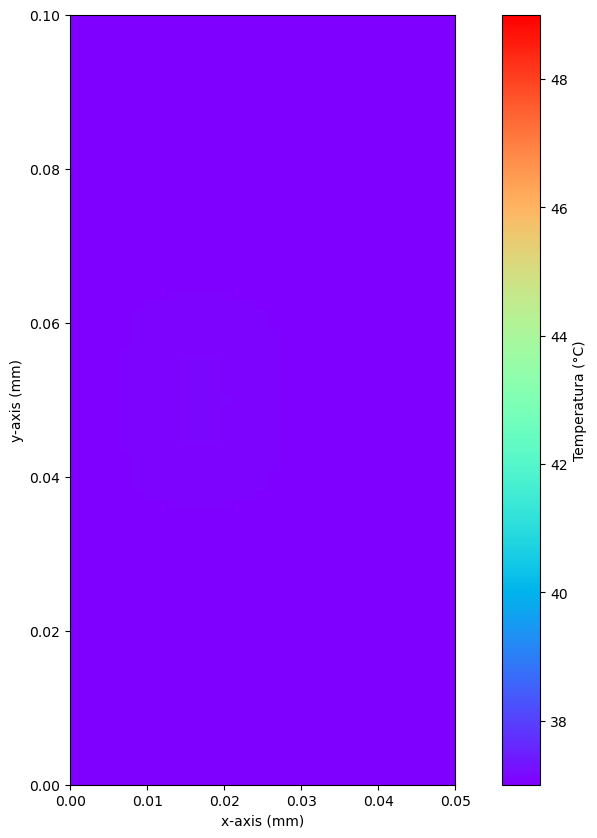

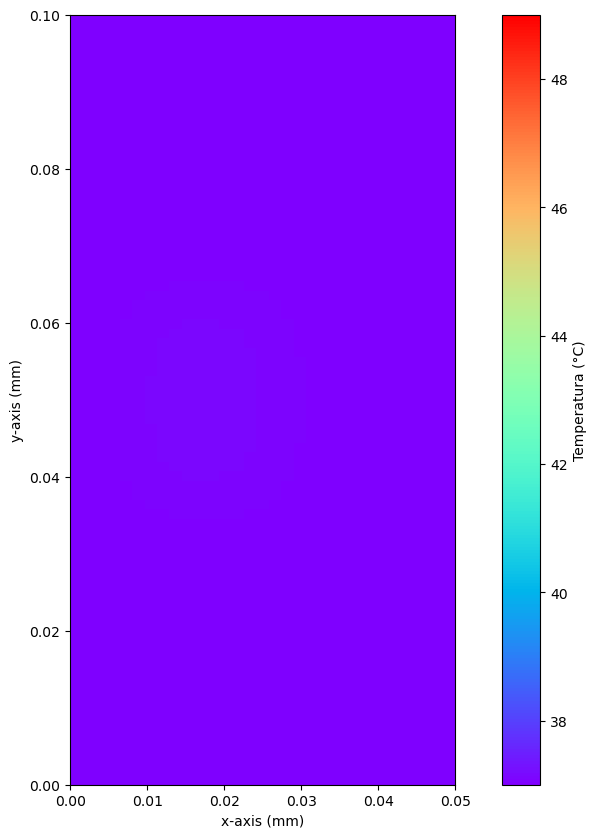

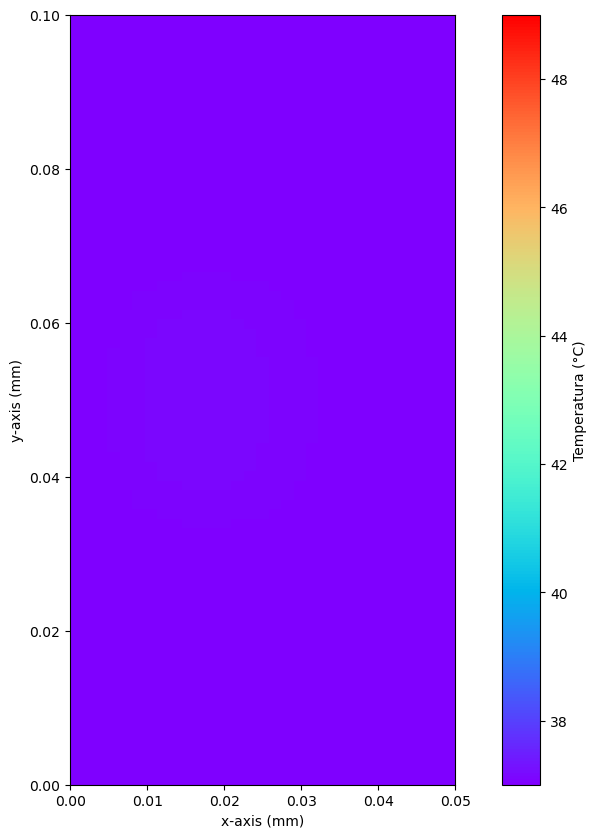

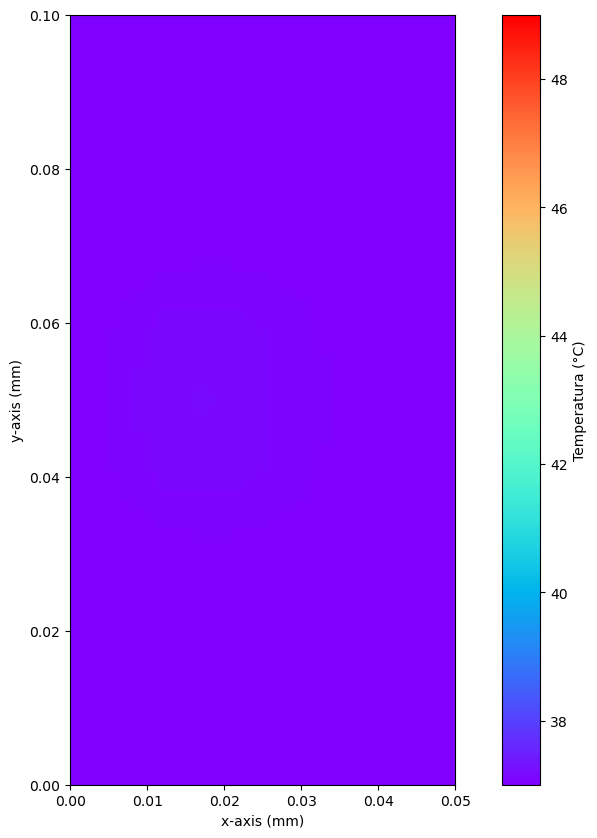

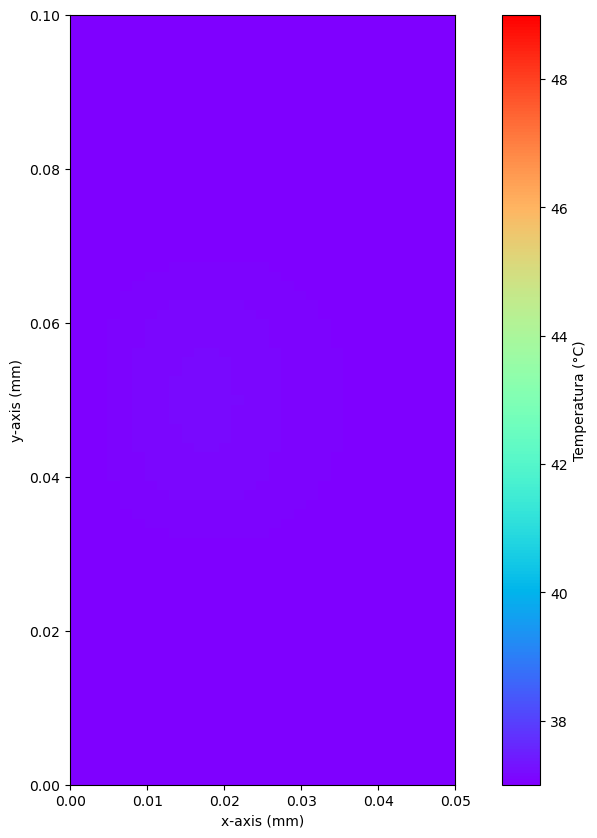

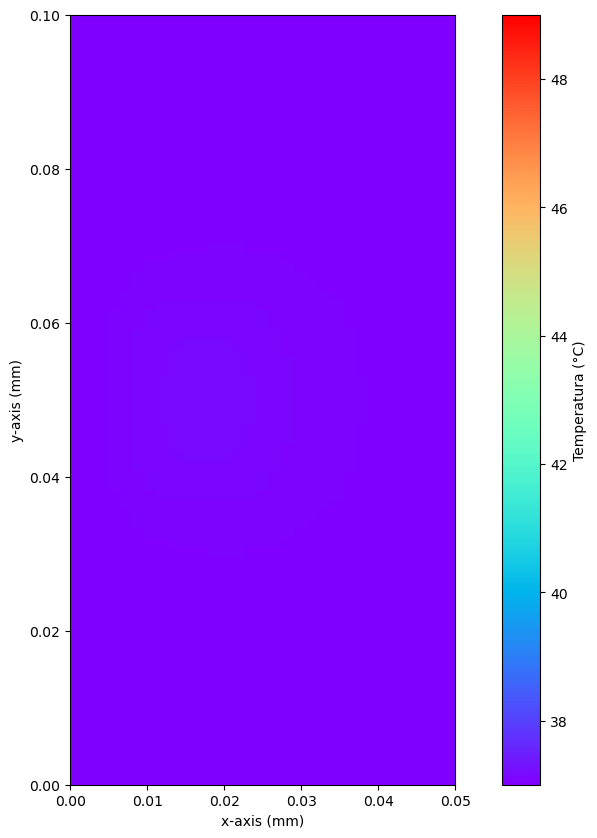

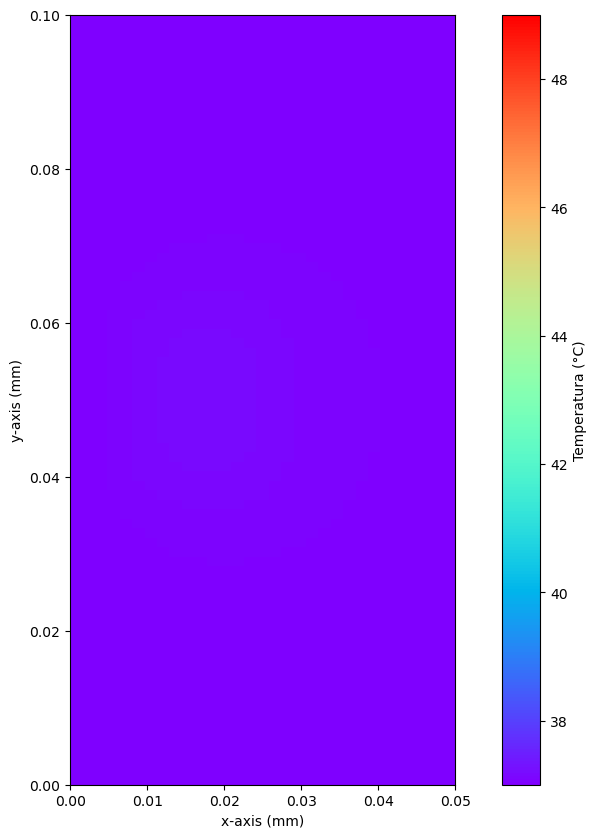

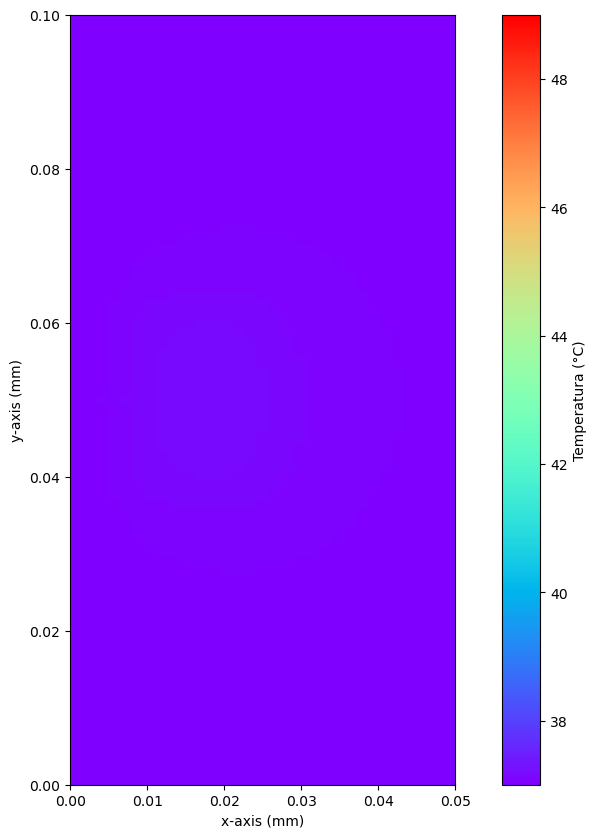

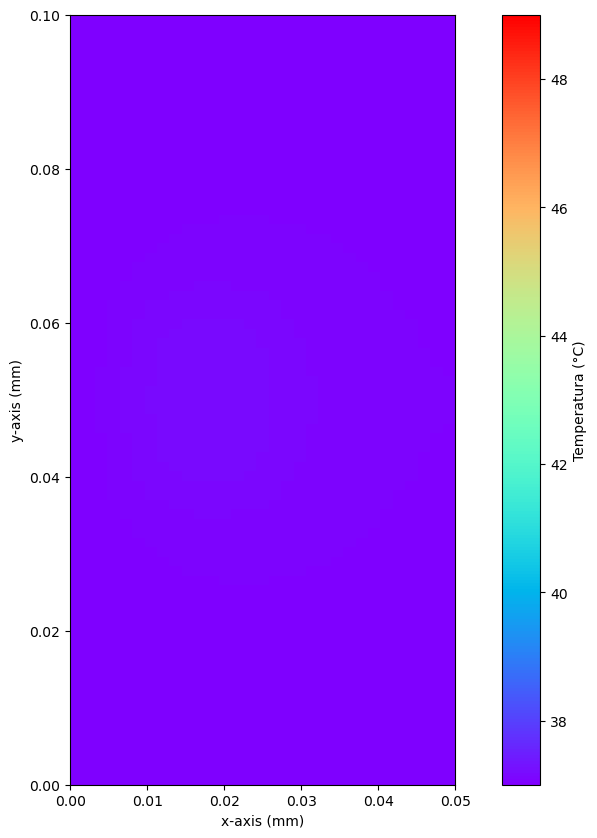

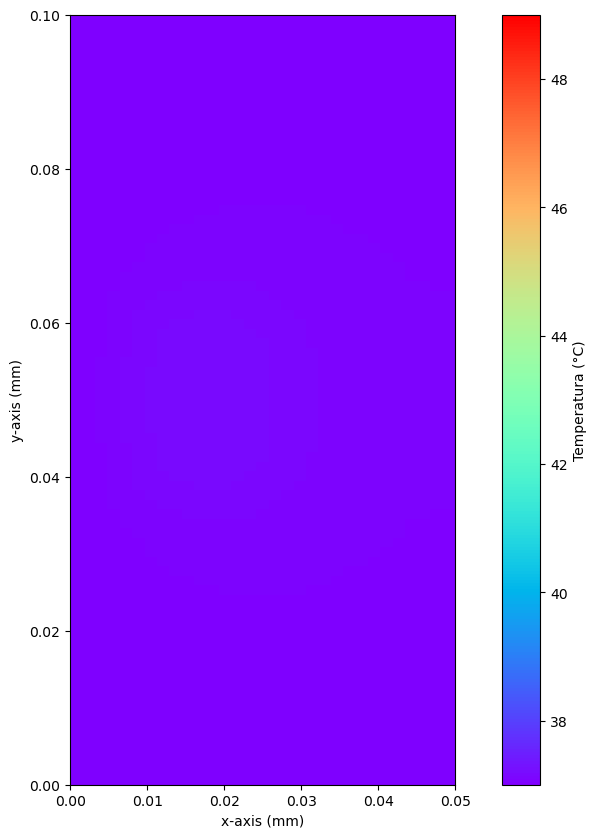

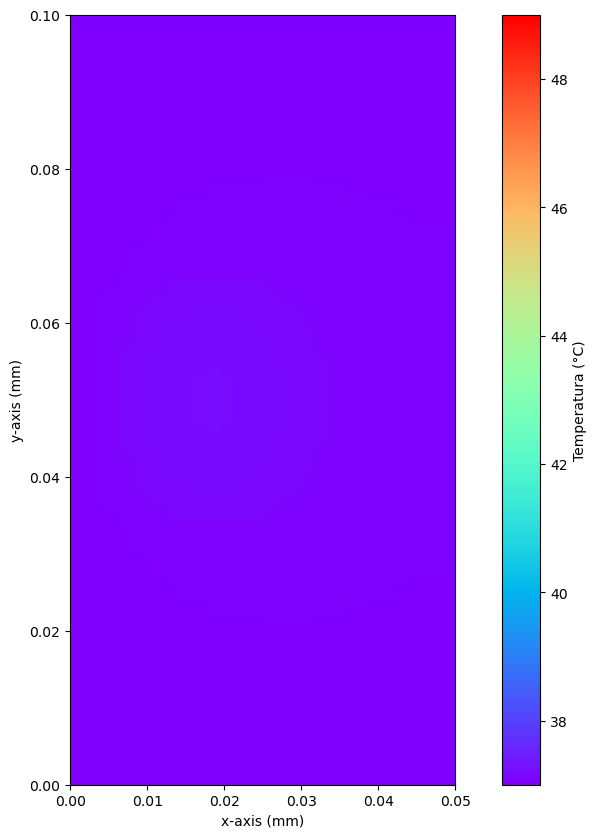

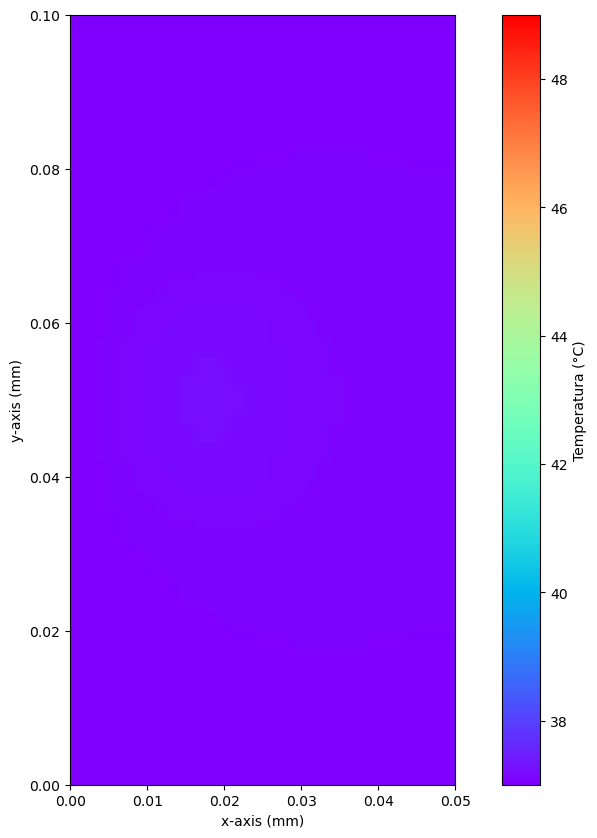

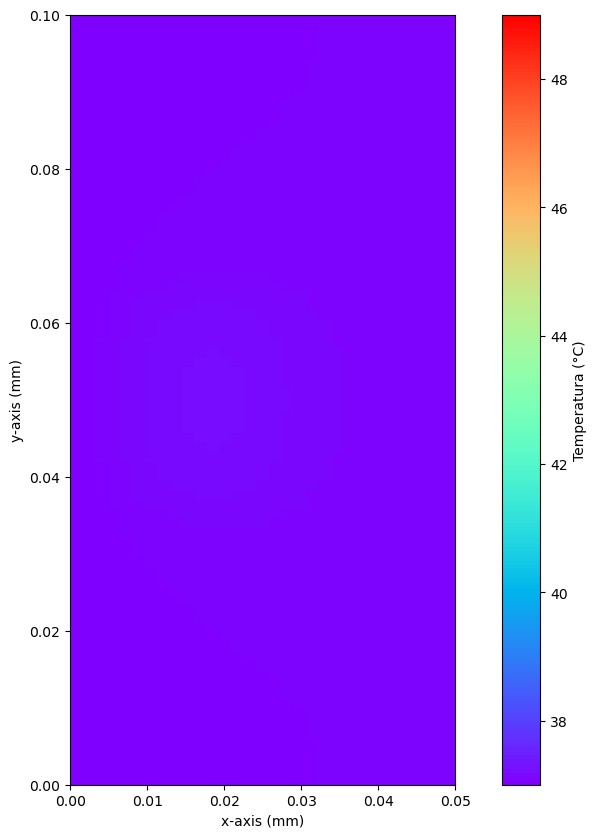

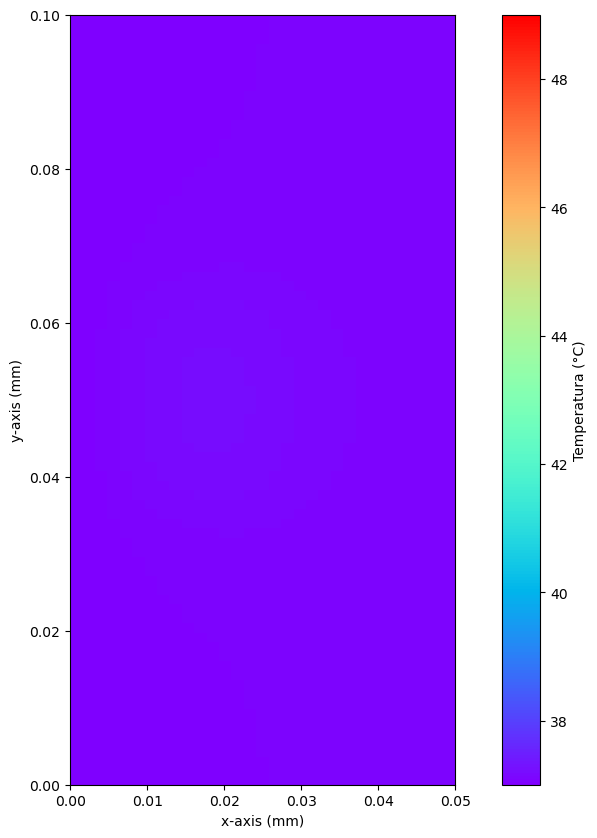

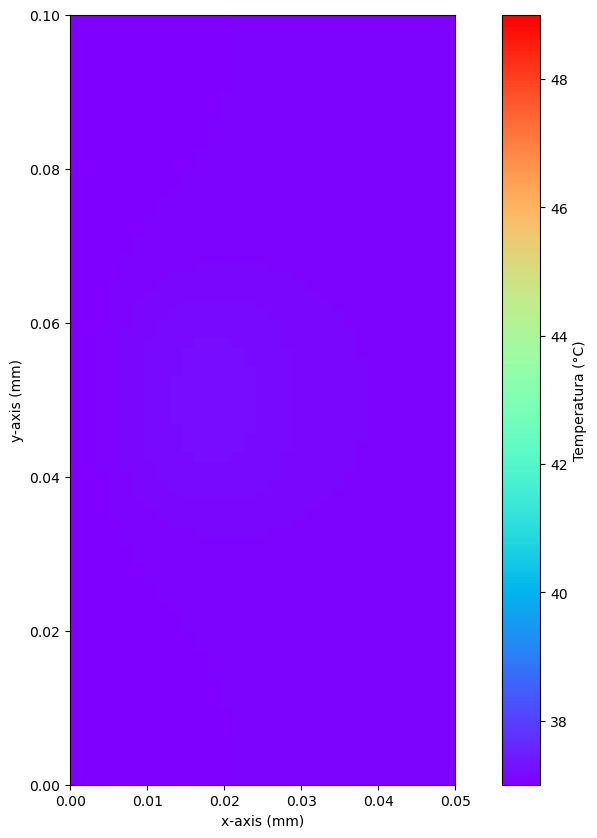

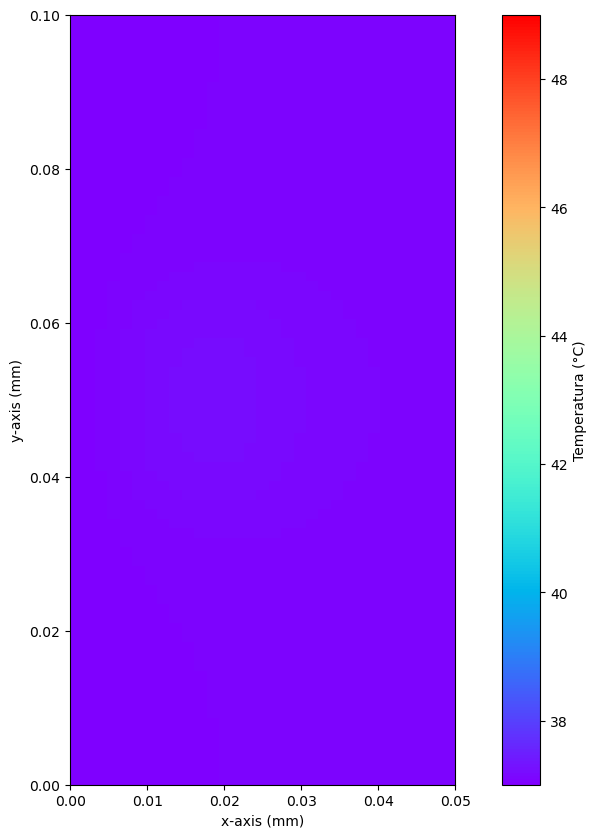

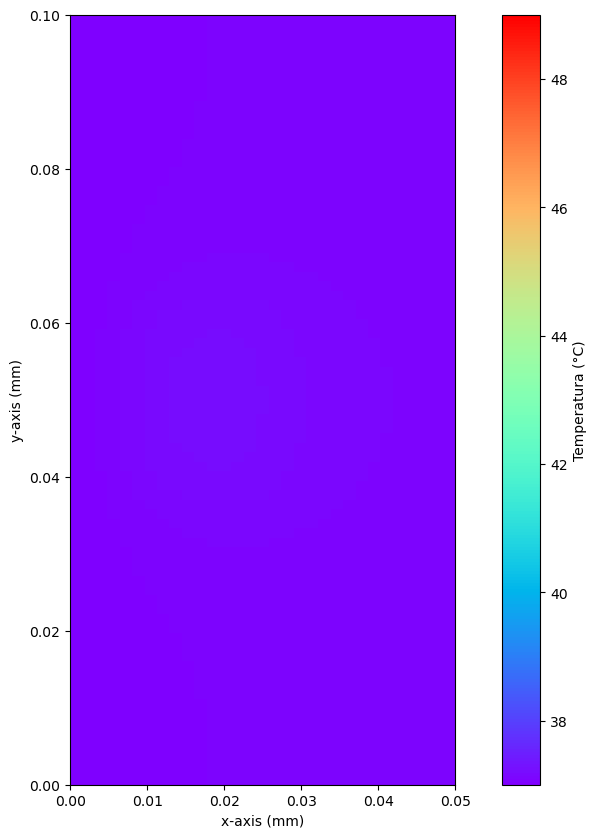

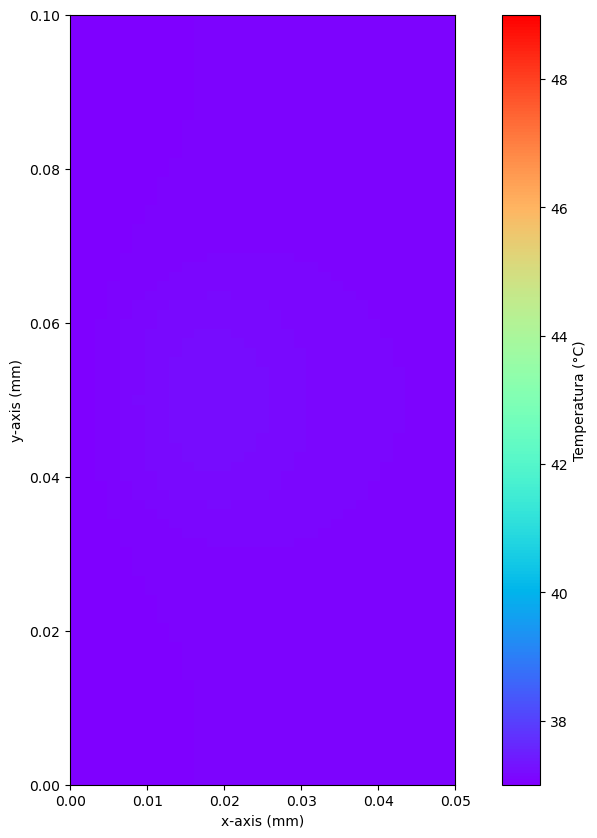

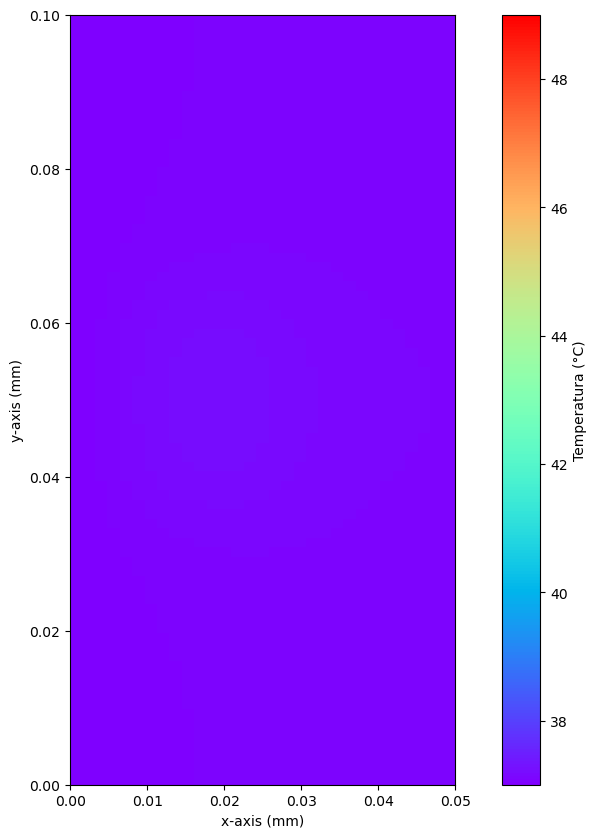

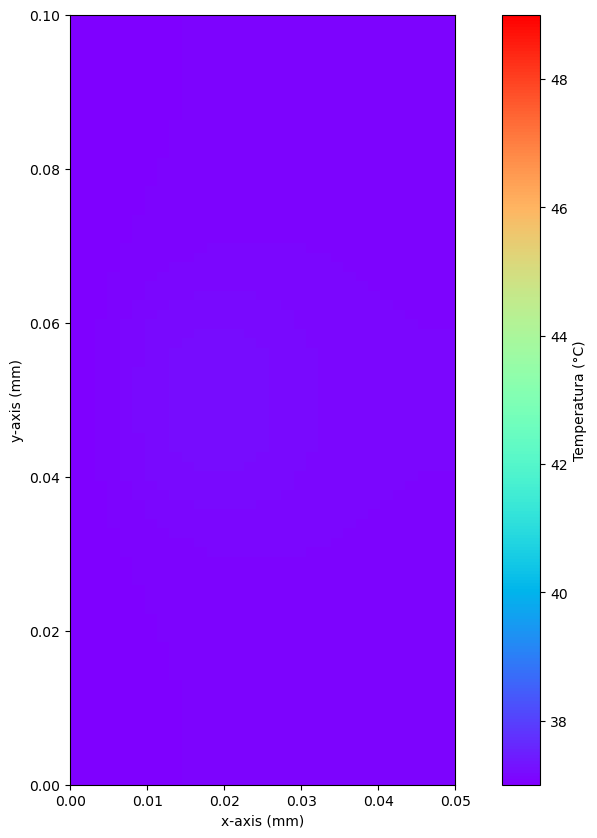

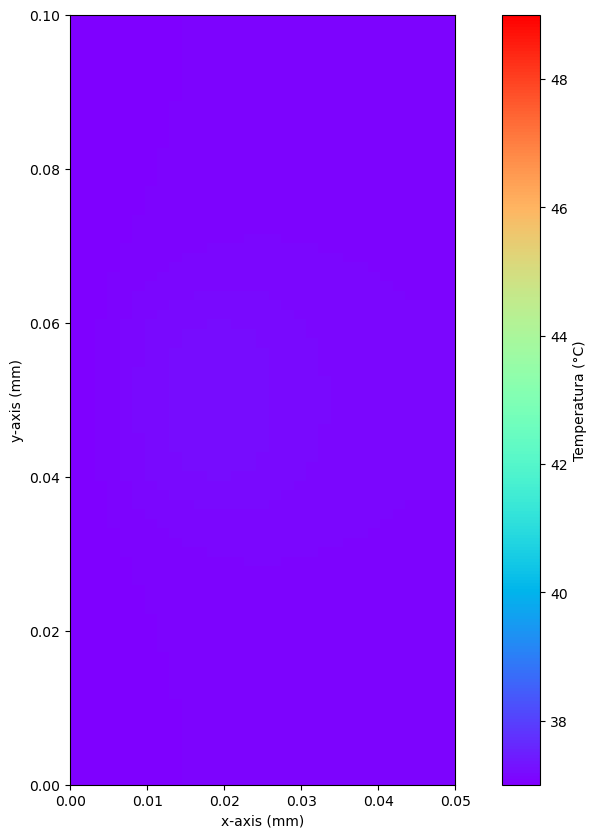

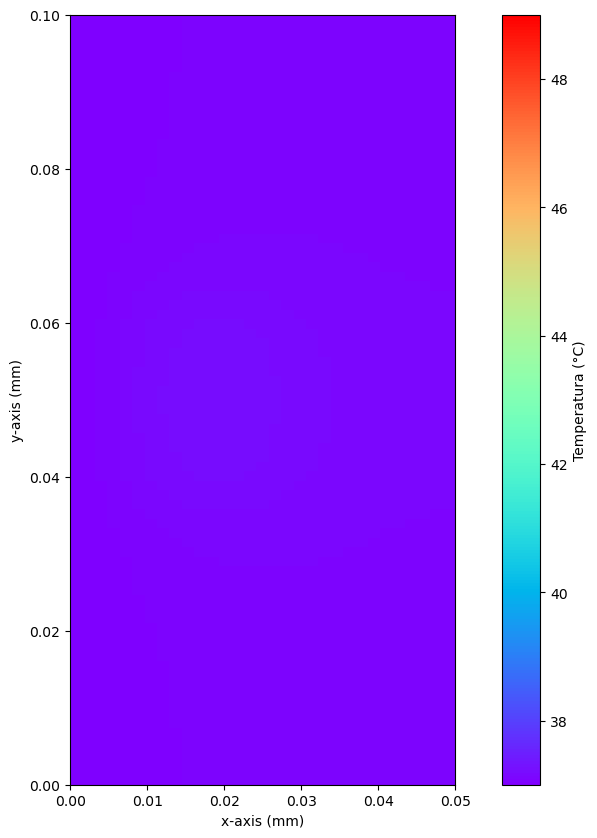

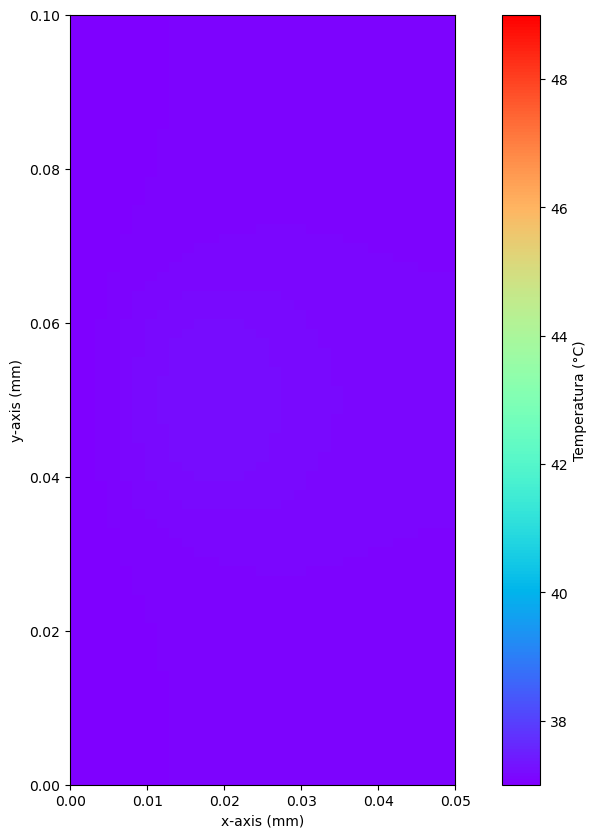

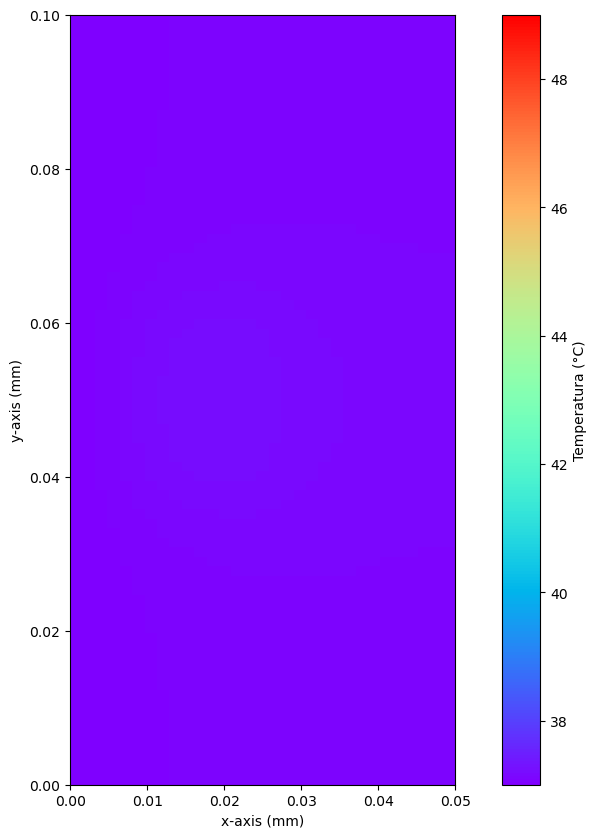

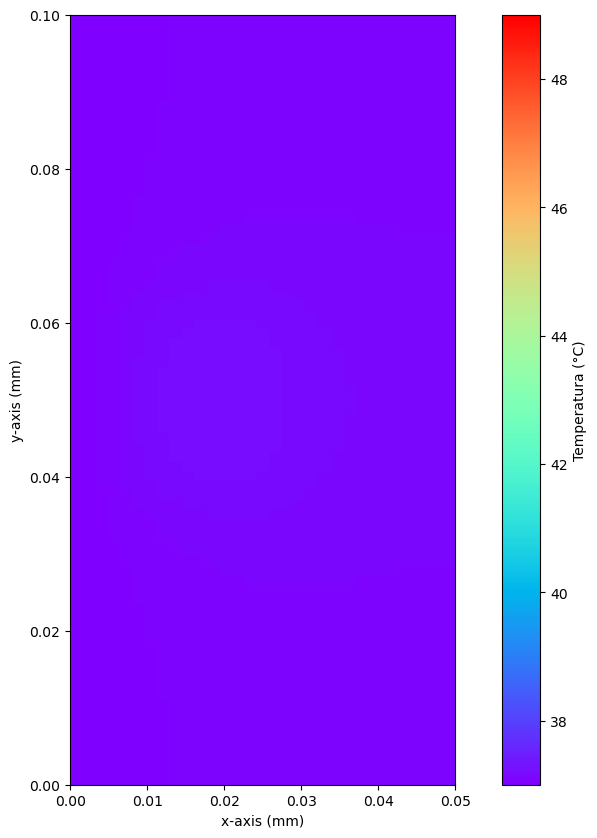

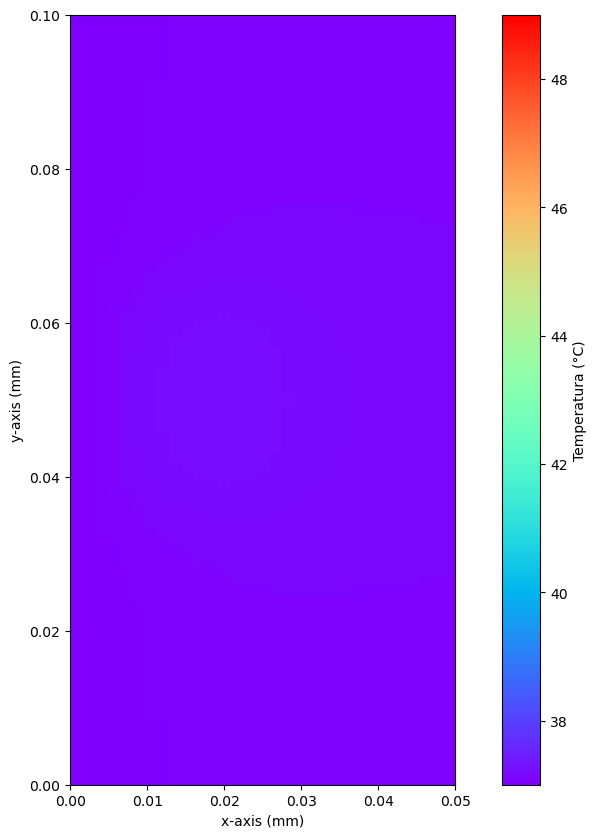

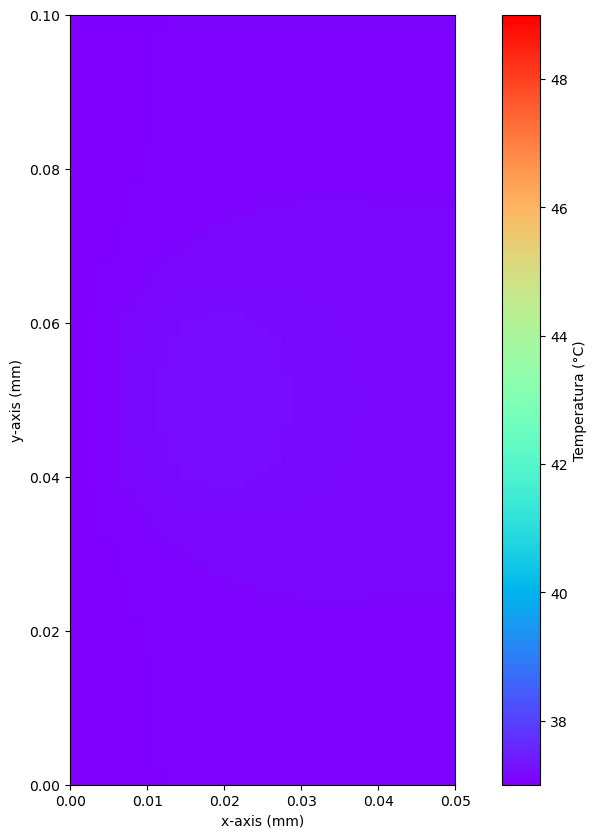

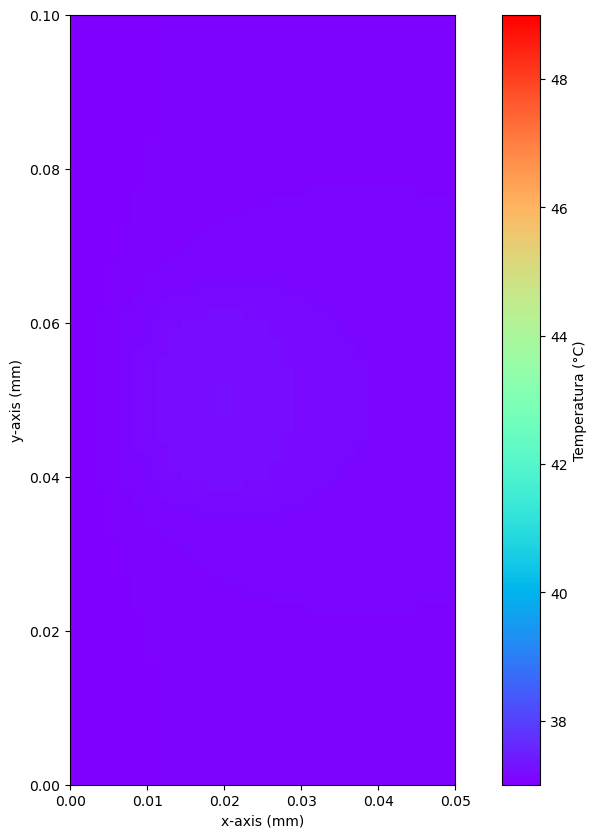

In [24]:
it = 100

for k in tqdm(range(0,len(sol_tempo), it)):
  fig = plt.figure()
  plt.xlabel('x-axis (mm)')
  plt.ylabel('Temperatura (°C)')
  plt.ylabel('y-axis (mm)')
  plt.imshow(np.transpose(sol_tempo[k]), vmin = 37.0 , vmax = 49.0, cmap = 'rainbow', interpolation = 'nearest', origin = 'lower', extent=[0,0.05,0,0.1])
  plt.colorbar(label = 'Temperatura (°C)')

  grafics = "calor" + str(k) + ".png"
  plt.savefig(grafics, dpi=96)
plt.show()
